In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "dim_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # 3D 데이터 초기화
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # 고르지 않은 분포
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # 타원형
X += 0.28 * np.random.randn(m, 3)  # 노이즈 추가
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # 약간 이동

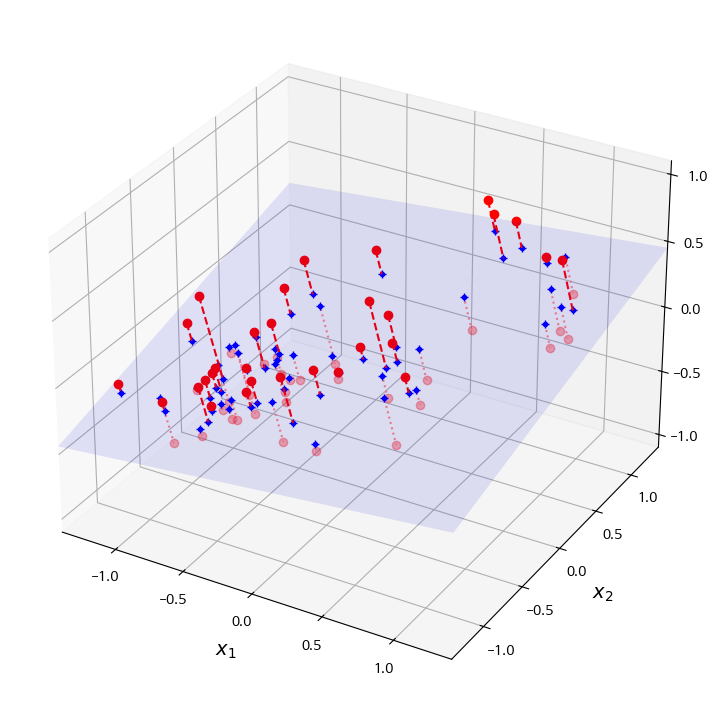

In [6]:
# 추가 코드 - 이 셀은 그림 8-2를 생성하고 저장합니다.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # 2D로 축소된 데이터셋
X3D_inv = pca.inverse_transform(X2D)  # 투영된 샘플의 3D 위치
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # 투영 평면의 계수
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # 평면
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # 평면 위의 샘플
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # 평면 아래 샘플

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# 평면 아래에 샘플과 투영선을 먼저 그립니다.
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # 투영 평면
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # 투영 샘플
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# 이제 평면 위 샘플과 투영선을 그립니다.
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

save_fig("dataset_3d_plot", tight_layout=False)
plt.show()

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np

# OpenML에서 MNIST 데이터셋을 로드합니다.
# as_frame=False는 데이터를 NumPy 배열로 가져오도록 합니다.
# parser='auto'는 향후 버전 경고를 피하기 위해 사용합니다.
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target

# 레이블을 정수형으로 변환합니다.
y = y.astype(np.uint8)

# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# fetch_openml을 통해 로드된 데이터는 이미 평탄화되어 있습니다 (28*28=784 특성).
# 따라서 추가적인 reshape는 필요하지 않습니다.

In [3]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# 1. 원본 데이터로 훈련 및 시간 측정
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

print("훈련 시간: {:.2f}s".format(t1 - t0))

# 테스트 세트 평가
y_pred = rnd_clf.predict(X_test)
print("원본 정확도:", accuracy_score(y_test, y_pred))

# 2. PCA를 사용하여 분산의 95%가 되도록 차원 축소
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

# 3. 축소된 데이터셋에 새로운 랜덤 포레스트 훈련 및 시간 측정
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)

t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

print("축소된 데이터 훈련 시간: {:.2f}s".format(t1 - t0))

# 4. 테스트 세트 평가 (테스트 세트도 transform 해야 함)
X_test_reduced = pca.transform(X_test)
y_pred_reduced = rnd_clf2.predict(X_test_reduced)
print("축소된 데이터 정확도:", accuracy_score(y_test, y_pred_reduced))

훈련 시간: 65.90s
원본 정확도: 0.9705
축소된 데이터 훈련 시간: 192.34s
축소된 데이터 정확도: 0.9488


In [8]:
import time
from sklearn.linear_model import SGDClassifier

# 1. 원본 데이터로 SGD 훈련
sgd_clf = SGDClassifier(random_state=42)
t0 = time.time()
sgd_clf.fit(X_train, y_train)
t1 = time.time()
print("SGD 원본 훈련 시간: {:.2f}s".format(t1 - t0))
print("SGD 원본 정확도:", accuracy_score(y_test, sgd_clf.predict(X_test)))

# 2. 축소된 데이터로 SGD 훈련
sgd_clf2 = SGDClassifier(random_state=42)
t0 = time.time()
sgd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print("SGD 축소 데이터 훈련 시간: {:.2f}s".format(t1 - t0))
print("SGD 축소 데이터 정확도:", accuracy_score(y_test, sgd_clf2.predict(X_test_reduced)))

SGD 원본 훈련 시간: 194.29s
SGD 원본 정확도: 0.874
SGD 축소 데이터 훈련 시간: 44.58s
SGD 축소 데이터 정확도: 0.8959


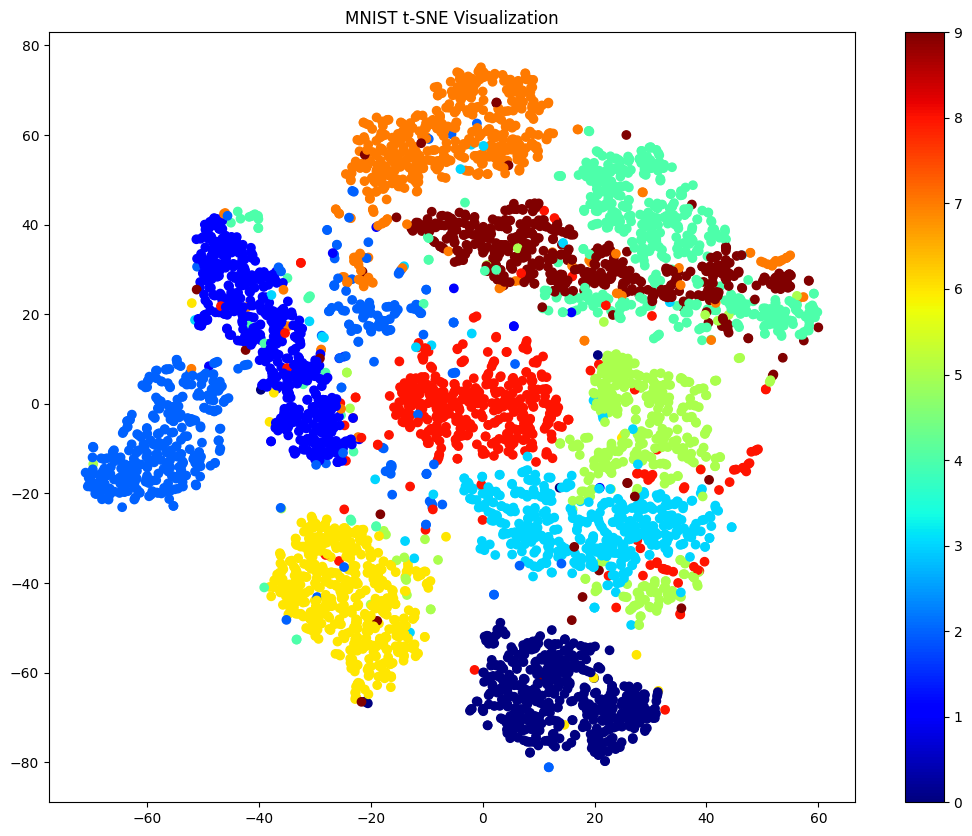

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 데이터 샘플링 (이미지 코드에 있음)
X_sample, y_sample = X_train[:5000], y_train[:5000]

# 1. t-SNE로 2차원으로 차원 축소
tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=42)
X_embedded = tsne.fit_transform(X_sample)

# 2. Matplotlib으로 산점도 그리기
plt.figure(figsize=(13, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_sample.astype(int), cmap="jet")
plt.colorbar()
plt.title("MNIST t-SNE Visualization")
plt.show()

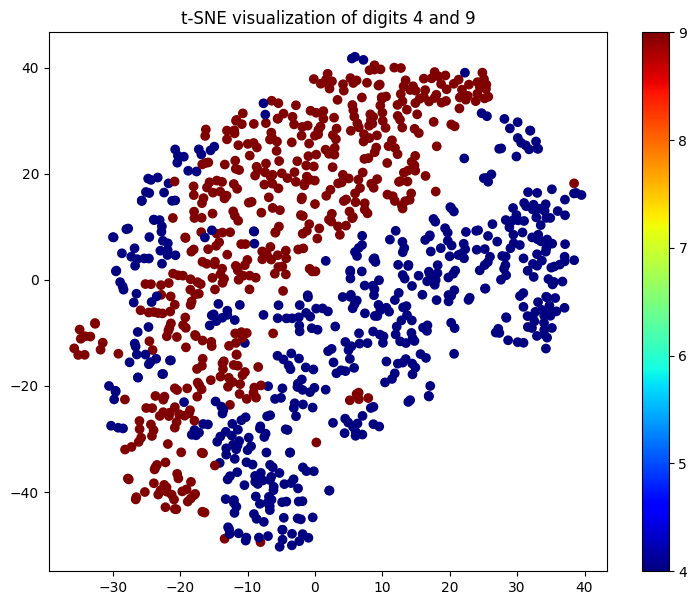

In [9]:
import numpy as np

# 1. 숫자 4와 9에 해당하는 인덱스만 추출 (불리언 인덱싱)
# y_train이 문자열인지 정수형인지에 따라 '4' 또는 4 로 조정 필요
target_indices = (y_sample == 4) | (y_sample == 9)

X_subset = X_sample[target_indices]
y_subset = y_sample[target_indices]

# 2. 해당 데이터로 t-SNE 다시 실행 (또는 위에서 변환한 좌표만 필터링해서 그려도 됨)
# 문제의 의도가 '새로 실행'이라면 아래 코드 사용
tsne_subset = TSNE(n_components=2, init='random', learning_rate='auto', random_state=42)
X_subset_embedded = tsne_subset.fit_transform(X_subset)

# 3. 시각화
plt.figure(figsize=(9, 7))
# 4와 9를 구분하여 그리기
scatter = plt.scatter(X_subset_embedded[:, 0], X_subset_embedded[:, 1], c=y_subset.astype(int), cmap="jet")
plt.colorbar(scatter)
plt.title("t-SNE visualization of digits 4 and 9")
plt.show()